# Program 4.08: Compare the average of cells in state B with its initial average using cell-cell signalling, over several realizations

## Preamble

In [ ]:
using NBInclude

In [ ]:
@nbinclude("preamble/packages.ipynb");

In [ ]:
@nbinclude("preamble/model.ipynb");

In [ ]:
@nbinclude("preamble/functions.ipynb");

## Initialization

In [ ]:
parameters = define_par();
dt = 0.002;
save_each = round(Int64, 0.2 / dt);

Random.seed!(3214)
n_cells = 300;

In [ ]:
tf = 30
ite = 10
n_bs = 7
bs = range(start = 0, length = n_bs, stop = 1);
# bs = [0.2,0.6]
# n_bs = length(bs);

## Formation of the aggregate

In [ ]:
com = initialize_growth(parameters; dt=dt);
grow_size!(com, save_each, n_cells)
m0 = length(com);
println(formed_correctly(com))

In [ ]:
growncom = deepcopy(com);

## Nonlinear differentiation kinetics: cell-cell signalling (protrusions off)

In [ ]:
com_aux = deepcopy(growncom)
prot = false;

### Loop

In [ ]:
Random.seed!(1234)
seeds = rand(1:2000, ite)
props = [[Dict() for j in 1:ite] for j in 1:n_bs];

In [ ]:
for i in 1:ite
    
	seed = seeds[i]
	println("Seed $i/$ite = $seed")
	Random.seed!(seed)
    
    for ib in 1:n_bs
		print("$ib...")
		global com = deepcopy(growncom)
		com.b = bs[ib]

		initialize_diff!(com)
        global m1 = length(com)
		differentiate!(com, save_each, tf, prot = prot)
        println(formed_correctly(com))
		global m2 = length(com)

		# push!(props[ib], get_props(com))
        props[ib][i] = get_props(com)
		# plot_aggregate(com, color_map, m1, m2)
	end

	println()
    
end

### Average proportion of cells in state B depending on its initial proportion

In [ ]:
dimensionalize_com!(com)

#### Simulation

In [ ]:
avg_bprops = [zeros(m2) for ib in 1:n_bs]
std_bprops = [zeros(m2) for ib in 1:n_bs]

for ib in 1:n_bs
    avg_bprops[ib] = [mean(props[ib][i][2][j] for i in 1:ite) for j in 1:m2]
    std_bprops[ib] = [std(props[ib][i][2][j] for i in 1:ite) for j in 1:m2]
end

In [ ]:
moments = round.(Int, range(start = m1, length = 5, stop = m2));
# m_24 = minimum([m for m in m1:m2 if com[m].t>23.9])
# m_48 = minimum([m for m in m1:m2 if com[m].t>47.9])
# moments = [m1, m_24, m_48, m2]

times = [com[moment].t for moment in moments];

In [ ]:
# phib_vs_b(com, m1, m2, avg_bprops, times, bs, std = std_bprops)

#### Comparison wit h the solutions

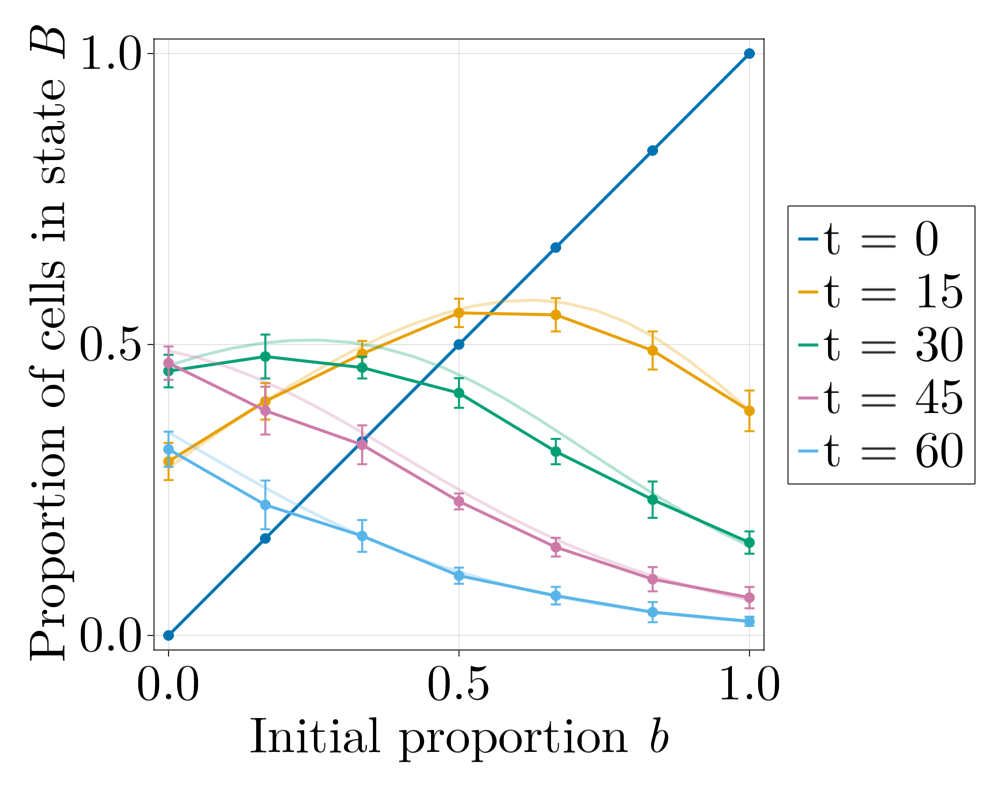

GLMakie.Screen(...)

In [16]:
phib_vs_b(com, m1, m2, avg_bprops, times, bs, std = std_bprops, compare=true)
# phib_vs_b(com, m1, m2, avg_bprops, times, bs, std = std_bprops, compare=true, compare_nbs=n_bs)

## Nonlinear differentiation kinetics: cell-cell signalling (fp = 50)

In [ ]:
com_aux = deepcopy(growncom)
prot = true;

### Loop

In [ ]:
Random.seed!(1234)
seeds = rand(1:2000, ite)
props = [[Dict() for j in 1:ite] for j in 1:n_bs];
# setfield!(com,:dt, 0.001);

In [ ]:
for i in 1:ite
    
	seed = seeds[i]
	println("Seed $i/$ite = $seed")
	Random.seed!(seed)
    
    for ib in 1:n_bs
		print("$ib...")
		global com = deepcopy(growncom)
		com.b = bs[ib]

		initialize_diff!(com)
        global m1 = length(com)
		differentiate!(com, save_each, tf, fp = 50, kp_on = 2, kp_off = 0.5)
        println(formed_correctly(com))
		global m2 = length(com)

		# push!(props[ib], get_props(com))
        props[ib][i] = get_props(com)
		# plot_aggregate(com, color_map, m1, m2)

        if !formed_correctly(com)
        	plot_aggregate(com, color_map, m1, m2)
        end 
	end

	println()
    
end

In [ ]:
dimensionalize_com!(com)

### Average proportion of cells in state B depending on b

#### Simulation

In [ ]:
avg_bprops = [zeros(m2) for ib in 1:n_bs]
std_bprops = [zeros(m2) for ib in 1:n_bs]

for ib in 1:n_bs
    avg_bprops[ib] = [mean(props[ib][i][2][j] for i in 1:ite) for j in 1:m2]
    std_bprops[ib] = [std(props[ib][i][2][j] for i in 1:ite) for j in 1:m2]
end

In [ ]:
moments = round.(Int, range(start = m1, length = 5, stop = m2));
# m_24 = minimum([m for m in m1:m2 if com[m].t>23.9])
# m_48 = minimum([m for m in m1:m2 if com[m].t>47.9])
# moments = [m1, m_24, m_48, m2]

times = [com[moment].t for moment in moments];

In [ ]:
# phib_vs_b(com, m1, m2, avg_bprops, times, bs, std = std_bprops)

#### Comparison with the solutions

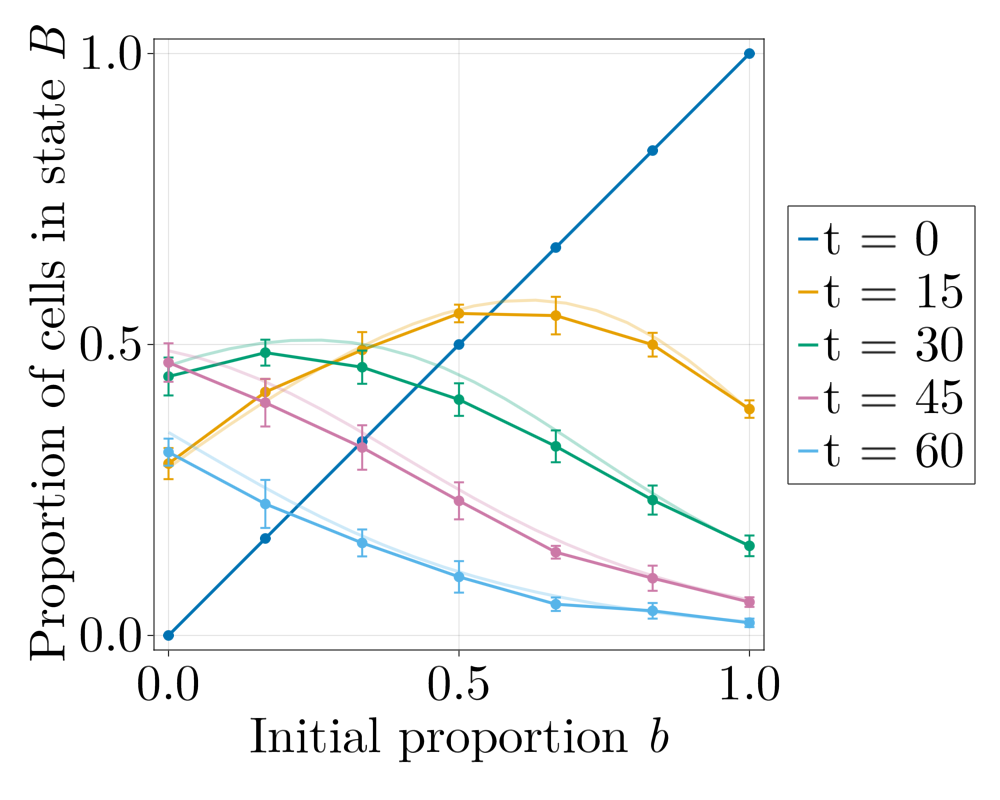

GLMakie.Screen(...)

In [16]:
phib_vs_b(com, m1, m2, avg_bprops, times, bs, std = std_bprops, compare=true)
# phib_vs_b(com, m1, m2, avg_bprops, times, bs, std = std_bprops, compare=true, compare_nbs=n_bs)

### Average proportion of cells in state A depending on b

#### Simulation

In [ ]:
avg_aprops = [zeros(m2) for ib in 1:n_bs]
std_aprops = [zeros(m2) for ib in 1:n_bs]

for ib in 1:n_bs
    avg_aprops[ib] = [mean(props[ib][i][1][j] for i in 1:ite) for j in 1:m2]
    std_aprops[ib] = [std(props[ib][i][1][j] for i in 1:ite) for j in 1:m2]
end

In [ ]:
moments = round.(Int, range(start = m1, length = 5, stop = m2));
# m_24 = minimum([m for m in m1:m2 if com[m].t>23.9])
# m_48 = minimum([m for m in m1:m2 if com[m].t>47.9])
# moments = [m1, m_24, m_48, m2]

times = [com[moment].t for moment in moments];

In [ ]:
# phib_vs_b(com, m1, m2, avg_bprops, times, bs, std = std_bprops)

#### Comparison with the solutions

Average proportion of cells in state A depending on b


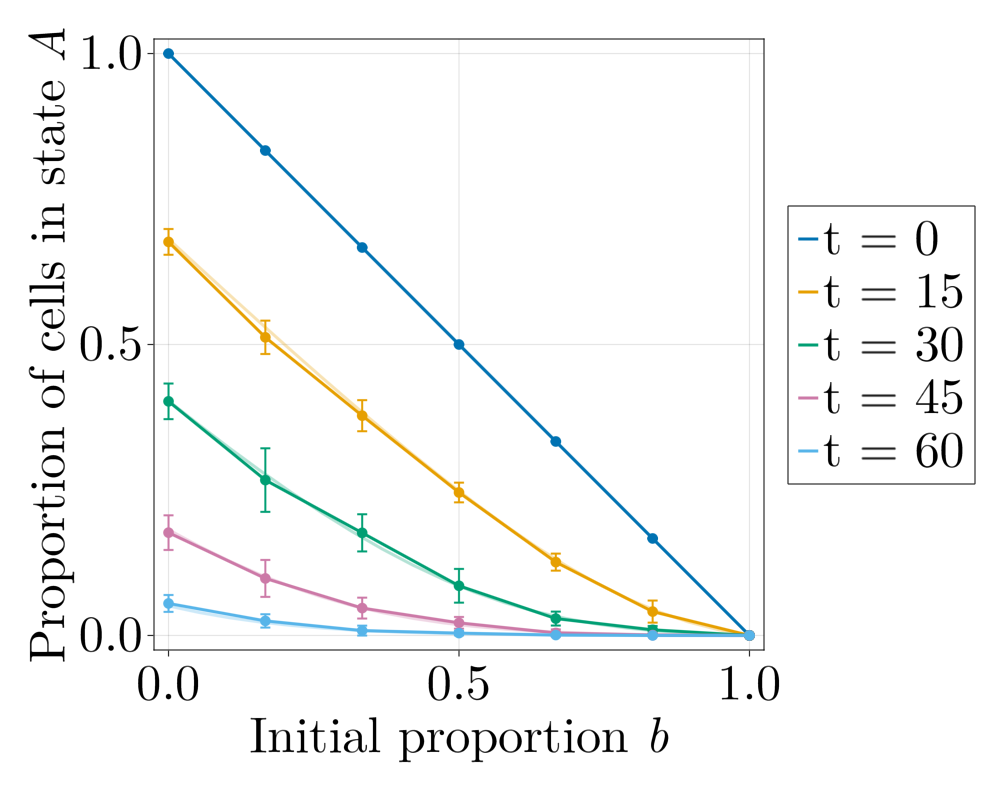

GLMakie.Screen(...)

In [20]:
phix_vs_b(com, m1, m2, avg_aprops, times, bs, std = std_aprops, compare=true, x=1)

### Average proportion of cells in state C depending on b

#### Simulation

In [ ]:
avg_cprops = [zeros(m2) for ib in 1:n_bs]
std_cprops = [zeros(m2) for ib in 1:n_bs]

for ib in 1:n_bs
    avg_cprops[ib] = [mean(props[ib][i][3][j] for i in 1:ite) for j in 1:m2]
    std_cprops[ib] = [std(props[ib][i][3][j] for i in 1:ite) for j in 1:m2]
end

In [ ]:
moments = round.(Int, range(start = m1, length = 5, stop = m2));
# m_24 = minimum([m for m in m1:m2 if com[m].t>23.9])
# m_48 = minimum([m for m in m1:m2 if com[m].t>47.9])
# moments = [m1, m_24, m_48, m2]

times = [com[moment].t for moment in moments];

#### Comparison with the solutions

Average proportion of cells in state C depending on b


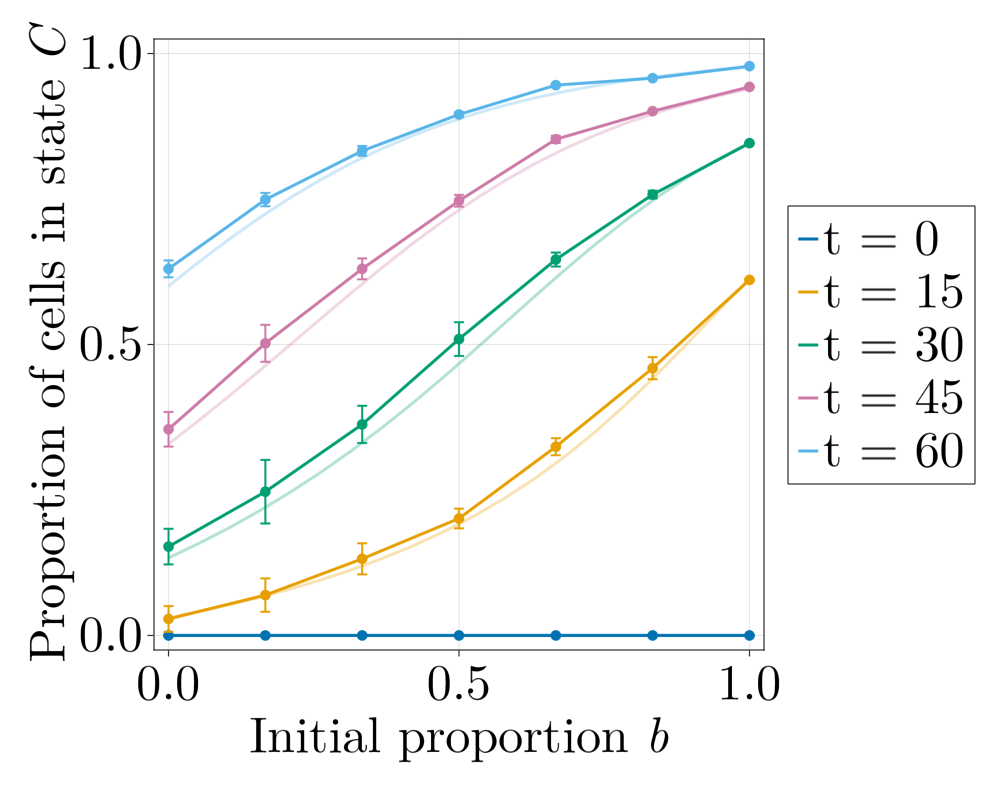

GLMakie.Screen(...)

In [23]:
phix_vs_b(com, m1, m2, avg_cprops, times, bs, std = std_aprops, compare=true, x=3)

## Nonlinear differentiation kinetics: cell-cell signalling (fp = 10)

In [ ]:
com_aux = deepcopy(growncom)
prot = true;

### Loop

In [ ]:
Random.seed!(1234)
seeds = rand(1:2000, ite)
props = [[Dict() for j in 1:ite] for j in 1:n_bs];

In [ ]:
for i in 1:ite
    
	seed = seeds[i]
	println("Seed $i/$ite = $seed")
	Random.seed!(seed)
    
    for ib in 1:n_bs
		print("$ib...")
		global com = deepcopy(growncom)
		com.b = bs[ib]

		initialize_diff!(com)
        global m1 = length(com)
		differentiate!(com, save_each, tf)
        println(formed_correctly(com))
		global m2 = length(com)

		# push!(props[ib], get_props(com))
        props[ib][i] = get_props(com)
		# plot_aggregate(com, color_map, m1, m2)
	end

	println()
    
end

In [ ]:
dimensionalize_com!(com)

### Average proportion of cells in state B depending on b

#### Simulation

In [ ]:
avg_bprops = [zeros(m2) for ib in 1:n_bs]
std_bprops = [zeros(m2) for ib in 1:n_bs]

for ib in 1:n_bs
    avg_bprops[ib] = [mean(props[ib][i][2][j] for i in 1:ite) for j in 1:m2]
    std_bprops[ib] = [std(props[ib][i][2][j] for i in 1:ite) for j in 1:m2]
end

In [ ]:
moments = round.(Int, range(start = m1, length = 5, stop = m2));
# m_24 = minimum([m for m in m1:m2 if com[m].t>23.9])
# m_48 = minimum([m for m in m1:m2 if com[m].t>47.9])
# moments = [m1, m_24, m_48, m2]

times = [com[moment].t for moment in moments];

In [ ]:
# phib_vs_b(com, m1, m2, avg_bprops, times, bs, std = std_bprops)

#### Comparison with the solutions

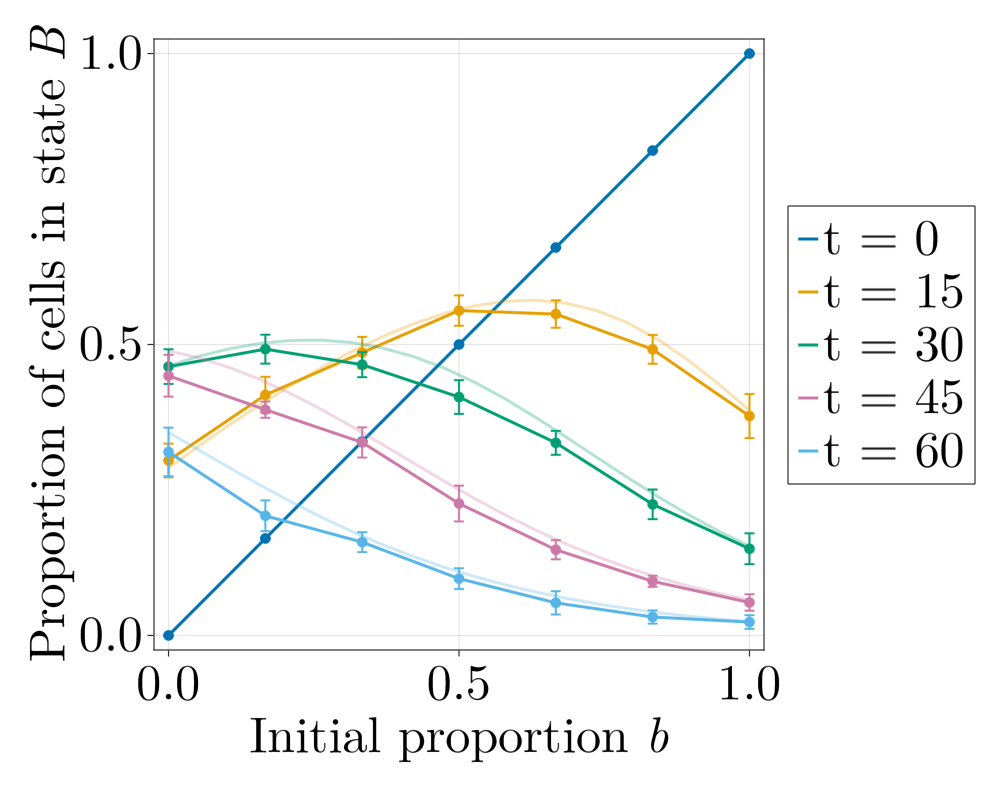

GLMakie.Screen(...)

In [31]:
phib_vs_b(com, m1, m2, avg_bprops, times, bs, std = std_bprops, compare=true)
# phib_vs_b(com, m1, m2, avg_bprops, times, bs, std = std_bprops, compare=true, compare_nbs=n_bs)

### Average proportion of cells in state A depending on b

#### Simulation

In [ ]:
avg_aprops = [zeros(m2) for ib in 1:n_bs]
std_aprops = [zeros(m2) for ib in 1:n_bs]

for ib in 1:n_bs
    avg_aprops[ib] = [mean(props[ib][i][1][j] for i in 1:ite) for j in 1:m2]
    std_aprops[ib] = [std(props[ib][i][1][j] for i in 1:ite) for j in 1:m2]
end

In [ ]:
moments = round.(Int, range(start = m1, length = 5, stop = m2));
# m_24 = minimum([m for m in m1:m2 if com[m].t>23.9])
# m_48 = minimum([m for m in m1:m2 if com[m].t>47.9])
# moments = [m1, m_24, m_48, m2]

times = [com[moment].t for moment in moments];

In [ ]:
# phib_vs_b(com, m1, m2, avg_bprops, times, bs, std = std_bprops)

#### Comparison with the solutions

Average proportion of cells in state A depending on b


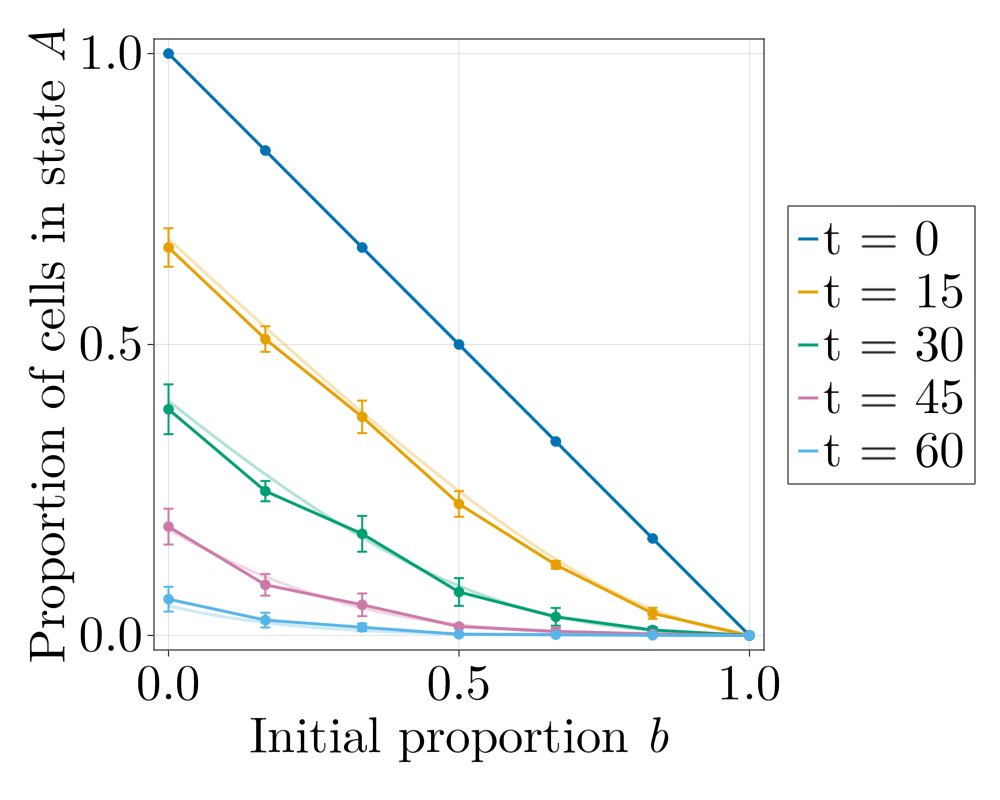

GLMakie.Screen(...)

In [35]:
phix_vs_b(com, m1, m2, avg_aprops, times, bs, std = std_aprops, compare=true, x=1)

### Average proportion of cells in state C depending on b

#### Simulation

In [ ]:
avg_cprops = [zeros(m2) for ib in 1:n_bs]
std_cprops = [zeros(m2) for ib in 1:n_bs]

for ib in 1:n_bs
    avg_cprops[ib] = [mean(props[ib][i][3][j] for i in 1:ite) for j in 1:m2]
    std_cprops[ib] = [std(props[ib][i][3][j] for i in 1:ite) for j in 1:m2]
end

In [ ]:
moments = round.(Int, range(start = m1, length = 5, stop = m2));
# m_24 = minimum([m for m in m1:m2 if com[m].t>23.9])
# m_48 = minimum([m for m in m1:m2 if com[m].t>47.9])
# moments = [m1, m_24, m_48, m2]

times = [com[moment].t for moment in moments];

#### Comparison with the solutions

Average proportion of cells in state C depending on b


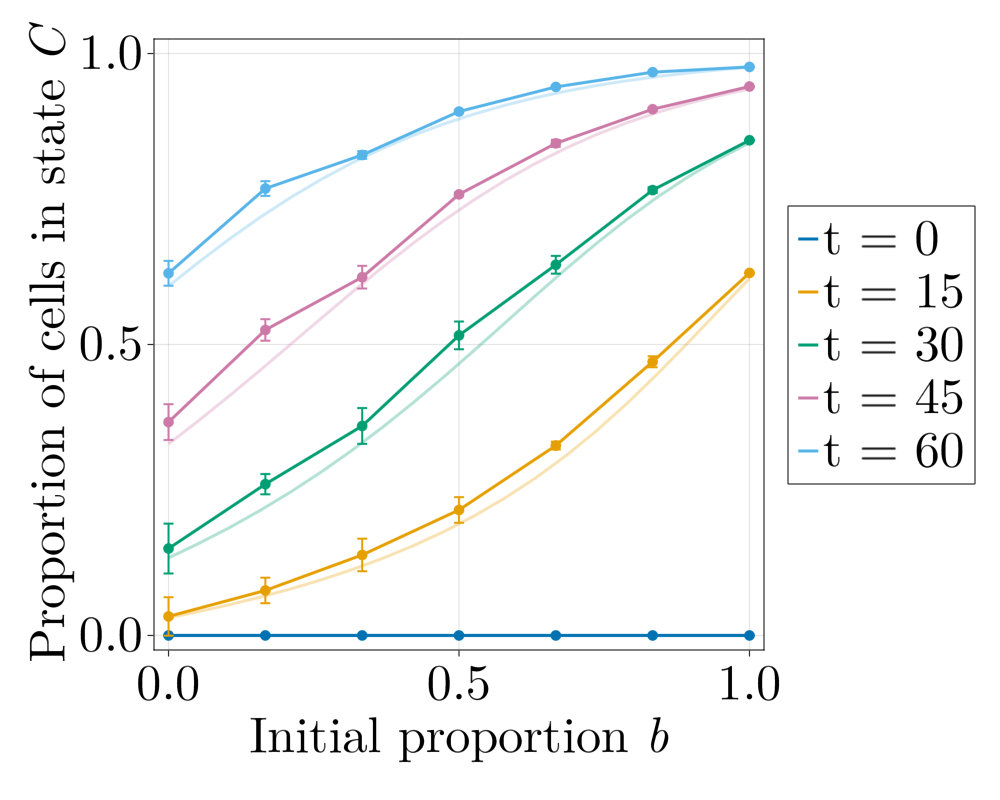

GLMakie.Screen(...)

In [38]:
phix_vs_b(com, m1, m2, avg_cprops, times, bs, std = std_aprops, compare=true, x=3)